In [101]:
import math
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [37]:
# by default, the kernel_initializer is 'glorot_uniform'
dense = tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

In [38]:
# if you want He initialization with uniform distribution based on fan_avg rather than fan_in (default)
he_avg_init = tf.keras.initializers.VarianceScaling(
    scale=2.0, mode="fan_avg", distribution="uniform"
)
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

In [39]:
# keras includes the classes for LeakyReLU and PReLU in tf.keras.layers you should use He initialization with these
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)  # default alpha is 0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

In [40]:
# if you prefer you can also use leaky_relu as a separate layer; it makes no difference in terms of performance
model = tf.keras.models.Sequential(
    [
        # more layers here
        tf.keras.layers.Dense(
            30, kernel_initializer="he_normal"
        ),  # no activation function
        tf.keras.layers.LeakyReLU(
            alpha=0.2
        ),  # this gives activation as a separate layer
        # more layers here
    ]
)

In [41]:
# the following are some smooth activation functions that are variants of ReLU
# activation='elu' is the exponential linear unit it is slower to compute but its faster to converge during training
# below is an example of a self regularized network using SELU
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(
        tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal")
    )
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [42]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"],
)

In [43]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# this scales the inputs to mean 0 and standard deviation 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [44]:
history = model.fit(
    X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid)
)

Epoch 1/5
1719/1719 [==============================] - 24s 9ms/step - loss: 1.2552 - accuracy: 0.5072 - val_loss: 0.8132 - val_accuracy: 0.6916
Epoch 2/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7585 - accuracy: 0.7207 - val_loss: 0.6655 - val_accuracy: 0.7634
Epoch 3/5
1719/1719 [==============================] - 16s 10ms/step - loss: 0.6149 - accuracy: 0.7735 - val_loss: 0.5611 - val_accuracy: 0.7986
Epoch 4/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5679 - accuracy: 0.7947 - val_loss: 0.5283 - val_accuracy: 0.8106
Epoch 5/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.5152 - accuracy: 0.8157 - val_loss: 0.5302 - val_accuracy: 0.8120


In [45]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal")
    )
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model.fit(
    X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid)
)
# not the best we suffered om vanishing gradients and exploding gradients

Epoch 1/5
1719/1719 [==============================] - 21s 9ms/step - loss: 1.9827 - accuracy: 0.2238 - val_loss: 1.6869 - val_accuracy: 0.2828
Epoch 2/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.3951 - accuracy: 0.4134 - val_loss: 1.1428 - val_accuracy: 0.4922
Epoch 3/5
1719/1719 [==============================] - 15s 8ms/step - loss: 1.1609 - accuracy: 0.5150 - val_loss: 1.1663 - val_accuracy: 0.4994
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.9070 - accuracy: 0.6369 - val_loss: 0.8881 - val_accuracy: 0.6218
Epoch 5/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8164 - accuracy: 0.6732 - val_loss: 0.7413 - val_accuracy: 0.7082


BATCH NORMILIZATION

In [46]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [47]:
# this is a simple way to implement batch normalization it works better on deeper networks this is after the activation function
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [48]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [49]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics="accuracy"
)
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5494 - accuracy: 0.8102 - val_loss: 0.3933 - val_accuracy: 0.8556
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4050 - accuracy: 0.8559 - val_loss: 0.3563 - val_accuracy: 0.8686


In [50]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [51]:
# if you want to use batch normalization before the activation function you need to add the activation function manually
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [52]:
# gradient clipping is another way to mitigate the exploding gradients problem
# typically used in recurrent neural networks where batch normalization is tricky to use
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
)

In [53]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
)
# this makes sure that when you clip the gradients the direction is preserved

In [54]:
# generally it is not a good idea to train a very deep neural network from scratch you can use transfer learning instead which takes a pretrained neural network and reuses its lower layers then you can add your own layers to the top of the pretrained network
# the more similar the tasks are the more layers you want to reuse

# extra code – split Fashion MNIST into tasks A and B, then train and save
#              model A to "my_model_A".
tf.keras.backend.clear_session()
tf.random.set_seed(42)
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")


def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))


(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(8, activation="softmax"),
    ]
)

model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model_A.fit(
    X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A)
)
model_A.save("my_model_A")

Epoch 1/20
1376/1376 [==============================] - 3s 2ms/step - loss: 1.1773 - accuracy: 0.6206 - val_loss: 0.6867 - val_accuracy: 0.7887
Epoch 2/20
1376/1376 [==============================] - 2s 2ms/step - loss: 0.5868 - accuracy: 0.8166 - val_loss: 0.4981 - val_accuracy: 0.8391
Epoch 3/20
1376/1376 [==============================] - 2s 2ms/step - loss: 0.4680 - accuracy: 0.8547 - val_loss: 0.4277 - val_accuracy: 0.8551
Epoch 4/20
1376/1376 [==============================] - 2s 2ms/step - loss: 0.4109 - accuracy: 0.8681 - val_loss: 0.3862 - val_accuracy: 0.8739
Epoch 5/20
1376/1376 [==============================] - 2s 1ms/step - loss: 0.3762 - accuracy: 0.8766 - val_loss: 0.3610 - val_accuracy: 0.8764
Epoch 6/20
1376/1376 [==============================] - 2s 1ms/step - loss: 0.3526 - accuracy: 0.8820 - val_loss: 0.3437 - val_accuracy: 0.8792
Epoch 7/20
1376/1376 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8870 - val_loss: 0.3299 - val_accuracy:

INFO:tensorflow:Assets written to: my_model_A/assets


INFO:tensorflow:Assets written to: my_model_A/assets


In [55]:
# extra code – train and evaluate model B, without reusing model A
tf.random.set_seed(42)
model_B = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_B.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"],
)
history = model_B.fit(
    X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B)
)
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 [==============================] - 1s 33ms/step - loss: 0.6006 - accuracy: 0.6150 - val_loss: 0.5948 - val_accuracy: 0.6686
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5795 - accuracy: 0.6850 - val_loss: 0.5764 - val_accuracy: 0.7339
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5619 - accuracy: 0.7700 - val_loss: 0.5611 - val_accuracy: 0.7705
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5448 - accuracy: 0.8100 - val_loss: 0.5456 - val_accuracy: 0.8091
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5291 - accuracy: 0.8650 - val_loss: 0.5295 - val_accuracy: 0.8556
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5127 - accuracy: 0.8900 - val_loss: 0.5135 - val_accuracy: 0.8833
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4963 - accuracy: 0.9150 - val_loss: 0.4981 - val_accuracy: 0.9031
Epoch 8/20
7/7 [===========

[0.3808637261390686, 0.925000011920929]

In [56]:
# this reuses all the layers except for the output layer
model_A = tf.keras.models.load_model("my_model_A")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [57]:
# model a and b share some layers when you train model b on a it will also affect model a if you want to avoid this you need to clone model a before you reuse its layers
tf.random.set_seed(42)
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
# tf.keras.models.clone_model() only clones the achitecture not the weights so we need to copy the weights manually
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [58]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(
    loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
# you must always compile your model after you freeze or unfreeze layers

In [59]:
# we are now going to train the model then unfree the hidden layers and train again after unfreezing it is a good idea to reduce the learning rate to avoid damaging the reused weights
history = model_B_on_A.fit(
    X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B)
)

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(
    loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
history = model_B_on_A.fit(
    X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B)
)

Epoch 1/4
7/7 [==============================] - 1s 32ms/step - loss: 1.5258 - accuracy: 0.4450 - val_loss: 0.9138 - val_accuracy: 0.4857
Epoch 2/4
7/7 [==============================] - 0s 11ms/step - loss: 0.8726 - accuracy: 0.4550 - val_loss: 0.7084 - val_accuracy: 0.6034
Epoch 3/4
7/7 [==============================] - 0s 11ms/step - loss: 0.7345 - accuracy: 0.5950 - val_loss: 0.6903 - val_accuracy: 0.5668
Epoch 4/4
7/7 [==============================] - 0s 10ms/step - loss: 0.6985 - accuracy: 0.5650 - val_loss: 0.6755 - val_accuracy: 0.5796
Epoch 1/16
7/7 [==============================] - 1s 30ms/step - loss: 0.6456 - accuracy: 0.6350 - val_loss: 0.5773 - val_accuracy: 0.7646
Epoch 2/16
7/7 [==============================] - 0s 10ms/step - loss: 0.5612 - accuracy: 0.7350 - val_loss: 0.5022 - val_accuracy: 0.8220
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.4832 - accuracy: 0.8200 - val_loss: 0.4727 - val_accuracy: 0.8091
Epoch 4/16
7/7 [===============

In [60]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.9405


[0.2455647736787796, 0.940500020980835]

In [61]:
# extra code – a little function to test an optimizer on Fashion MNIST


def build_model(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    return tf.keras.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(
                100, activation="relu", kernel_initializer="he_normal"
            ),
            tf.keras.layers.Dense(
                100, activation="relu", kernel_initializer="he_normal"
            ),
            tf.keras.layers.Dense(
                100, activation="relu", kernel_initializer="he_normal"
            ),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )


def build_and_train_model(optimizer):
    model = build_model()
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"],
    )
    return model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [79]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [80]:
history_sgd = build_and_train_model(
    optimizer
)  # momentum likes to converge faster than sgd becuase it keeps going in the same direction and it picks up speed on the way

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3112 - accuracy: 0.5887 - val_loss: 0.8518 - val_accuracy: 0.7126
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7654 - accuracy: 0.7382 - val_loss: 0.6796 - val_accuracy: 0.7660
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6525 - accuracy: 0.7794 - val_loss: 0.6028 - val_accuracy: 0.7960
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5930 - accuracy: 0.7993 - val_loss: 0.5617 - val_accuracy: 0.8104
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5556 - accuracy: 0.8124 - val_loss: 0.5361 - val_accuracy: 0.8134
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5288 - accuracy: 0.8202 - val_loss: 0.5208 - val_accuracy: 0.8156
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5097 - accuracy: 0.8249 - val_loss: 0.4970 - val_accuracy:

In [81]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_momentum = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6830 - accuracy: 0.7656 - val_loss: 0.5035 - val_accuracy: 0.8154
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4702 - accuracy: 0.8362 - val_loss: 0.4586 - val_accuracy: 0.8370
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4277 - accuracy: 0.8499 - val_loss: 0.4142 - val_accuracy: 0.8540
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4002 - accuracy: 0.8595 - val_loss: 0.3893 - val_accuracy: 0.8620
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3786 - accuracy: 0.8667 - val_loss: 0.3723 - val_accuracy: 0.8630
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3639 - accuracy: 0.8707 - val_loss: 0.3724 - val_accuracy: 0.8666
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3471 - accuracy: 0.8750 - val_loss: 0.3673 - val_accuracy:

In [82]:
# nesterov accelerated gradient almost always faster than momentum it measures the gradient of the cost function not at the local position but slightly ahead in the direction of the momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6978 - accuracy: 0.7633 - val_loss: 0.4910 - val_accuracy: 0.8272
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4627 - accuracy: 0.8390 - val_loss: 0.4421 - val_accuracy: 0.8386
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4184 - accuracy: 0.8523 - val_loss: 0.3994 - val_accuracy: 0.8606
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3915 - accuracy: 0.8621 - val_loss: 0.3772 - val_accuracy: 0.8668
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3694 - accuracy: 0.8695 - val_loss: 0.3717 - val_accuracy: 0.8640
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8739 - val_loss: 0.3645 - val_accuracy: 0.8686
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3405 - accuracy: 0.8777 - val_loss: 0.3806 - val_accuracy:

In [83]:
# adagrad is an adaptive learning rate algorithm it starts with a large learning rate and then reduces it for each parameter individually based on the past gradients for that parameter
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0673 - accuracy: 0.6690 - val_loss: 0.7109 - val_accuracy: 0.7682
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6619 - accuracy: 0.7818 - val_loss: 0.5955 - val_accuracy: 0.7990
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5829 - accuracy: 0.8060 - val_loss: 0.5444 - val_accuracy: 0.8168
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5421 - accuracy: 0.8185 - val_loss: 0.5140 - val_accuracy: 0.8236
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5153 - accuracy: 0.8273 - val_loss: 0.4930 - val_accuracy: 0.8302
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4961 - accuracy: 0.8325 - val_loss: 0.4780 - val_accuracy: 0.8350
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4815 - accuracy: 0.8370 - val_loss: 0.4666 - val_accuracy:

In [84]:
# RMSProp is similar to adagrad but it accumulates only the gradients from the most recent iterations (as opposed to all the gradients since the beginning of training)
# tume the decay rate and the learning rate
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5164 - accuracy: 0.8131 - val_loss: 0.4461 - val_accuracy: 0.8246
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8582 - val_loss: 0.4350 - val_accuracy: 0.8452
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3686 - accuracy: 0.8679 - val_loss: 0.4071 - val_accuracy: 0.8586
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3603 - accuracy: 0.8753 - val_loss: 0.3944 - val_accuracy: 0.8714
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3532 - accuracy: 0.8788 - val_loss: 0.3488 - val_accuracy: 0.8744
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3433 - accuracy: 0.8799 - val_loss: 0.4327 - val_accuracy: 0.8552
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3467 - accuracy: 0.8807 - val_loss: 0.4291 - val_accuracy:

In [85]:
# Adam is a combination of momentum optimization and RMSProp it keeps track of an exponentially decaying average of past gradients and of past squared gradients
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5000 - accuracy: 0.8204 - val_loss: 0.4240 - val_accuracy: 0.8426
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8631 - val_loss: 0.3944 - val_accuracy: 0.8440
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3399 - accuracy: 0.8750 - val_loss: 0.3422 - val_accuracy: 0.8762
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8828 - val_loss: 0.3519 - val_accuracy: 0.8734
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2992 - accuracy: 0.8884 - val_loss: 0.3289 - val_accuracy: 0.8762
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.8933 - val_loss: 0.3539 - val_accuracy: 0.8752
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.8974 - val_loss: 0.3588 - val_accuracy:

In [86]:
# AdaMax is a variant of Adam based on the infinity norm it is less affected by vanishing and exploding gradients than other variants of Adam but it is slower to converge
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5377 - accuracy: 0.8115 - val_loss: 0.4420 - val_accuracy: 0.8342
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3974 - accuracy: 0.8590 - val_loss: 0.3951 - val_accuracy: 0.8498
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3597 - accuracy: 0.8697 - val_loss: 0.3787 - val_accuracy: 0.8630
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8793 - val_loss: 0.3462 - val_accuracy: 0.8734
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8858 - val_loss: 0.3266 - val_accuracy: 0.8812
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8908 - val_loss: 0.3277 - val_accuracy: 0.8794
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2848 - accuracy: 0.8948 - val_loss: 0.3346 - val_accuracy:

In [87]:
# nadam is Adam plus Nesterov it is faster to converge than Adam but it is not always better
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4848 - accuracy: 0.8266 - val_loss: 0.4420 - val_accuracy: 0.8250
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3695 - accuracy: 0.8652 - val_loss: 0.3872 - val_accuracy: 0.8554
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8767 - val_loss: 0.3671 - val_accuracy: 0.8738
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3118 - accuracy: 0.8859 - val_loss: 0.3415 - val_accuracy: 0.8770
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8901 - val_loss: 0.3291 - val_accuracy: 0.8734
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.8963 - val_loss: 0.3622 - val_accuracy: 0.8740
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.8985 - val_loss: 0.3603 - val_accuracy:

In [88]:
# adamw is Adam plus weight decay regularization it can converge faster than Adam but it is not always better
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5067 - accuracy: 0.8190 - val_loss: 0.4533 - val_accuracy: 0.8238
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8628 - val_loss: 0.3912 - val_accuracy: 0.8540
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3416 - accuracy: 0.8749 - val_loss: 0.3628 - val_accuracy: 0.8668
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.8828 - val_loss: 0.3432 - val_accuracy: 0.8728
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2998 - accuracy: 0.8880 - val_loss: 0.3269 - val_accuracy: 0.8760
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8941 - val_loss: 0.3791 - val_accuracy: 0.8730
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.8968 - val_loss: 0.3444 - val_accuracy:

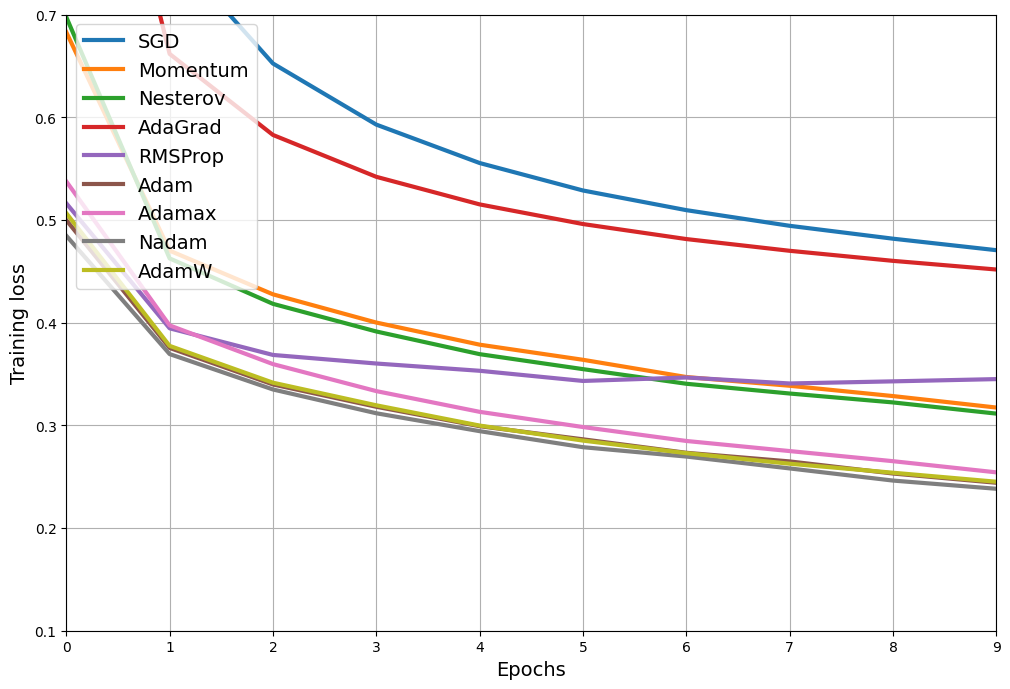

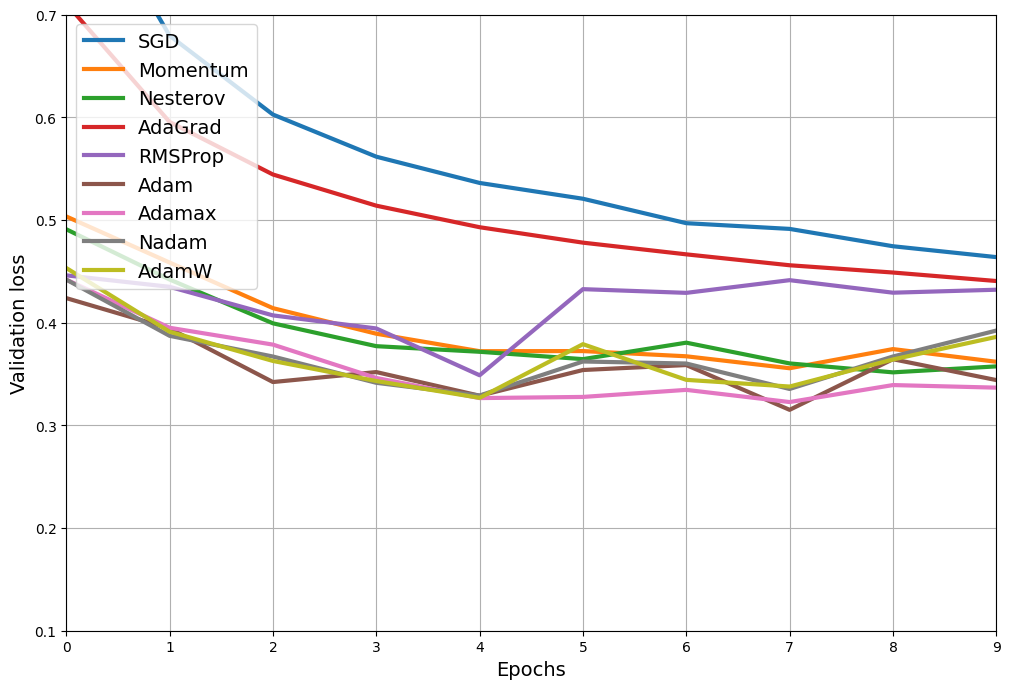

In [89]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip(
        (
            history_sgd,
            history_momentum,
            history_nesterov,
            history_adagrad,
            history_rmsprop,
            history_adam,
            history_adamax,
            history_nadam,
            history_adamw,
        ),
        opt_names.split(),
    ):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

In [91]:
# power learning rate scheduling
# lr = lr0 / (1 + steps / s)**c
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, weight_decay=1e-4)
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6670 - accuracy: 0.7734 - val_loss: 0.4766 - val_accuracy: 0.8344
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4642 - accuracy: 0.8358 - val_loss: 0.4449 - val_accuracy: 0.8404
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4190 - accuracy: 0.8506 - val_loss: 0.4127 - val_accuracy: 0.8542
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3949 - accuracy: 0.8603 - val_loss: 0.3832 - val_accuracy: 0.8658
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3750 - accuracy: 0.8653 - val_loss: 0.3723 - val_accuracy: 0.8668
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3586 - accuracy: 0.8714 - val_loss: 0.3742 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3472 - accuracy: 0.8737 - val_loss: 0.3654 - val_accuracy:

In [92]:
# exponential learning rate scheduling
# lr = lr0 * 0.1**(epoch / s)
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)


def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)

    return exponential_decay_fn


exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [93]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

In [94]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_scheduler],
)

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6763 - accuracy: 0.7675 - val_loss: 0.4974 - val_accuracy: 0.8236 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4701 - accuracy: 0.8347 - val_loss: 0.4582 - val_accuracy: 0.8342 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4244 - accuracy: 0.8508 - val_loss: 0.4099 - val_accuracy: 0.8560 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4000 - accuracy: 0.8597 - val_loss: 0.3910 - val_accuracy: 0.8662 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3808 - accuracy: 0.8655 - val_loss: 0.3820 - val_accuracy: 0.8638 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3654 - accuracy: 0.8700 - val_loss: 0.3822 - val_accuracy: 0.8630 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 2s

In [97]:
# piecewise constant scheduling
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)

    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]

    return piecewise_constant_fn


piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [98]:
n_epochs = 25
lr0 = 0.01

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
history = model.fit(
    X_train,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_scheduler],
)

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5447 - accuracy: 0.8075 - val_loss: 0.5190 - val_accuracy: 0.8184 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4542 - accuracy: 0.8407 - val_loss: 0.4559 - val_accuracy: 0.8348 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4299 - accuracy: 0.8494 - val_loss: 0.5124 - val_accuracy: 0.8358 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4254 - accuracy: 0.8516 - val_loss: 0.4087 - val_accuracy: 0.8570 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4317 - accuracy: 0.8495 - val_loss: 0.4112 - val_accuracy: 0.8560 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3714 - accuracy: 0.8676 - val_loss: 0.4098 - val_accuracy: 0.8604 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 3s

In [99]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)

In [100]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
history = model.fit(
    X_train,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_scheduler],
)

Epoch 1/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7092 - accuracy: 0.7556 - val_loss: 0.4968 - val_accuracy: 0.8230 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4778 - accuracy: 0.8317 - val_loss: 0.4676 - val_accuracy: 0.8302 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4281 - accuracy: 0.8475 - val_loss: 0.4295 - val_accuracy: 0.8510 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8573 - val_loss: 0.3871 - val_accuracy: 0.8602 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8639 - val_loss: 0.3789 - val_accuracy: 0.8616 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3623 - accuracy: 0.8708 - val_loss: 0.3900 - val_accuracy: 0.8648 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 3s

In [102]:
batch_size = 32
n_epochs = 25
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=n_steps, decay_rate=0.1
)
optimizer = tf.keras.optimizers.SGD(learning_rate=scheduled_learning_rate)
model = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6969 - accuracy: 0.7619 - val_loss: 0.4955 - val_accuracy: 0.8280
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4716 - accuracy: 0.8355 - val_loss: 0.4494 - val_accuracy: 0.8366
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4240 - accuracy: 0.8501 - val_loss: 0.4124 - val_accuracy: 0.8540
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4001 - accuracy: 0.8579 - val_loss: 0.3877 - val_accuracy: 0.8606
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8655 - val_loss: 0.3801 - val_accuracy: 0.8610
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3662 - accuracy: 0.8687 - val_loss: 0.3775 - val_accuracy: 0.8642
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.8720 - val_loss: 0.3648 - val_accuracy:

In [103]:
# 1 cycle scheduling
K = tf.keras.backend


class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(
            self.model.optimizer.learning_rate,
            self.model.optimizer.learning_rate * self.factor,
        )


def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4, max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses


def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale("log")
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [104]:
model = build_model()
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"],
)

430/430 [==============================] - 2s 3ms/step - loss: 1.8844 - accuracy: 0.3636


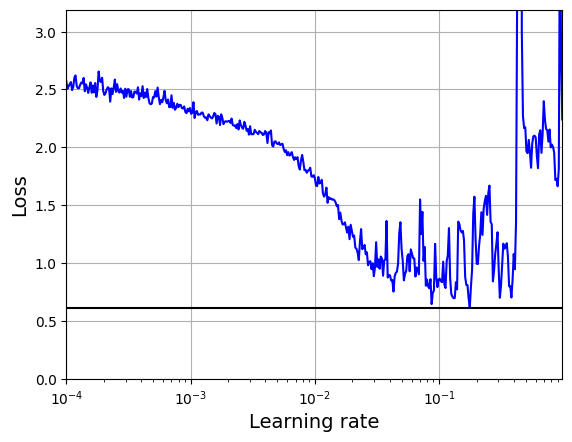

In [105]:
batch_size = 128
rates, losses = find_learning_rate(
    model, X_train, y_train, epochs=1, batch_size=batch_size
)
plot_lr_vs_loss(rates, losses)

In [106]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(
        self, iterations, max_lr=1e-3, start_lr=None, last_iterations=None, last_lr=None
    ):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr, self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(
                self.half_iteration, 2 * self.half_iteration, self.max_lr, self.start_lr
            )
        else:
            lr = self._interpolate(
                2 * self.half_iteration, self.iterations, self.start_lr, self.last_lr
            )
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [107]:
# 1 cycle scheduling model
model = build_model()
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)
n_epochs = 25
onecycle = OneCycleScheduler(
    math.ceil(len(X_train) / batch_size) * n_epochs, max_lr=0.1
)
history = model.fit(
    X_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(X_valid, y_valid),
    callbacks=[onecycle],
)

Epoch 1/25
430/430 [==============================] - 1s 3ms/step - loss: 0.9743 - accuracy: 0.6840 - val_loss: 0.5969 - val_accuracy: 0.7994
Epoch 2/25
430/430 [==============================] - 1s 2ms/step - loss: 0.5812 - accuracy: 0.7995 - val_loss: 0.5017 - val_accuracy: 0.8224
Epoch 3/25
430/430 [==============================] - 1s 2ms/step - loss: 0.5080 - accuracy: 0.8220 - val_loss: 0.4752 - val_accuracy: 0.8298
Epoch 4/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.8362 - val_loss: 0.4278 - val_accuracy: 0.8476
Epoch 5/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8462 - val_loss: 0.4394 - val_accuracy: 0.8406
Epoch 6/25
430/430 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8552 - val_loss: 0.4799 - val_accuracy: 0.8220
Epoch 7/25
430/430 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8604 - val_loss: 0.4125 - val_accuracy: 0.8488
Epoch 

AVOIDING OVERFITTING THROUGH REGULARIZATION

In [108]:
# this is how you appy l2 regularization to a layer's connection weights
layer = tf.keras.layers.Dense(
    100,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.01),
)
# the l2 funtion returns a regularizer that will be called at each step during training to compute the regularization loss and add it to the main loss
# if you want l1 regularization, use tf.keras.regularizers.l1() and if you want both, use tf.keras.regularizers.l1_l2()

In [112]:
# this lets us create a thin wrapper around any function to turn it into a regularizer
from functools import partial

RegularizedDense = partial(
    tf.keras.layers.Dense,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_regularizer=tf.keras.regularizers.l2(0.01),
)
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        RegularizedDense(100),
        RegularizedDense(100),
        RegularizedDense(10, activation="softmax"),
    ]
)

In [113]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 3s 1ms/step - loss: 3.1384 - accuracy: 0.7675 - val_loss: 1.8649 - val_accuracy: 0.8222
Epoch 2/2
1719/1719 [==============================] - 2s 1ms/step - loss: 1.4301 - accuracy: 0.8107 - val_loss: 1.1305 - val_accuracy: 0.8148


In [115]:
# dropout
# dropout is one of the most popular regularization techniques for deep neural networks and it is fairly efficient
# it forces neurons to only rely on their inputs and not on the output of their peers so they become more independent and more robust
# a unique neural network is generated at each training step and all these networks share the same weights
# after training, neurons don't get dropped anymore
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [116]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6691 - accuracy: 0.7551 - val_loss: 0.4656 - val_accuracy: 0.8264
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5125 - accuracy: 0.8127 - val_loss: 0.4260 - val_accuracy: 0.8384
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4755 - accuracy: 0.8255 - val_loss: 0.4073 - val_accuracy: 0.8456
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4522 - accuracy: 0.8344 - val_loss: 0.3854 - val_accuracy: 0.8554
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4365 - accuracy: 0.8391 - val_loss: 0.3719 - val_accuracy: 0.8580
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4236 - accuracy: 0.8434 - val_loss: 0.3699 - val_accuracy: 0.8626
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4151 - accuracy: 0.8474 - val_loss: 0.3688 - val_accuracy:

In [117]:
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.8843


[0.3125638961791992, 0.8842909336090088]

In [118]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8655


[0.36983945965766907, 0.8654999732971191]

In [119]:
y_probas = np.stack([model(X_test, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [120]:
model.predict(X_test[:1]).round(3)

1/1 [==============================] - 0s 139ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.026, 0.   , 0.133, 0.   ,
        0.841]], dtype=float32)

In [121]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.071, 0.   , 0.211, 0.001,
       0.715], dtype=float32)

In [122]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.001, 0.   , 0.001, 0.002, 0.002, 0.098, 0.001, 0.157, 0.006,
       0.184], dtype=float32)

In [123]:
y_pred = y_proba.argmax(axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8673

In [124]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [125]:
# shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential(
    [
        MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
        for layer in model.layers
    ]
)
mc_model.set_weights(model.get_weights())

In [126]:
mc_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 mc_dropout (MCDropout)      (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 mc_dropout_1 (MCDropout)    (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 mc_dropout_2 (MCDropout)    (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [127]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1]) for sample in range(100)], axis=0).round(2)

1/1 [==============================] - 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.18, 0.  , 0.73]],
      dtype=float32)

In [128]:
# max norm regularization
# for each neuron it constrains the weights of the incoming connections such that ||w||2 <= r where r is the max norm hyperparameter and ||.||2 is the l2 norm
# max norm regularization does not add a regularization loss term to the overall loss function but instead it is typically implemented by computing ||w||2 after each training step and clipping w if needed
# this constraint forces the weights to remain small and the optimization algorithm will have a harder time overfitting the training set
dense = tf.keras.layers.Dense(
    100,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.0),
)

In [129]:
# shows how to apply max norm to every hidden layer in a model
MaxNormDense = partial(
    tf.keras.layers.Dense,
    activation="relu",
    kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.0),
)

tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        MaxNormDense(100),
        MaxNormDense(100),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5514 - accuracy: 0.8024 - val_loss: 0.4348 - val_accuracy: 0.8304
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4127 - accuracy: 0.8494 - val_loss: 0.4356 - val_accuracy: 0.8294
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3814 - accuracy: 0.8594 - val_loss: 0.3984 - val_accuracy: 0.8586
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3621 - accuracy: 0.8664 - val_loss: 0.3519 - val_accuracy: 0.8706
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.8686 - val_loss: 0.3524 - val_accuracy: 0.8660
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3453 - accuracy: 0.8710 - val_loss: 0.4031 - val_accuracy: 0.8570
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8751 - val_loss: 0.3758 - val_accuracy: